In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [19]:

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("✅ Duplicates & Nulls Removed")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


✅ Duplicates & Nulls Removed
Rows: 32828, Columns: 23


In [25]:

features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

print("✅ Features Normalized")


✅ Features Normalized


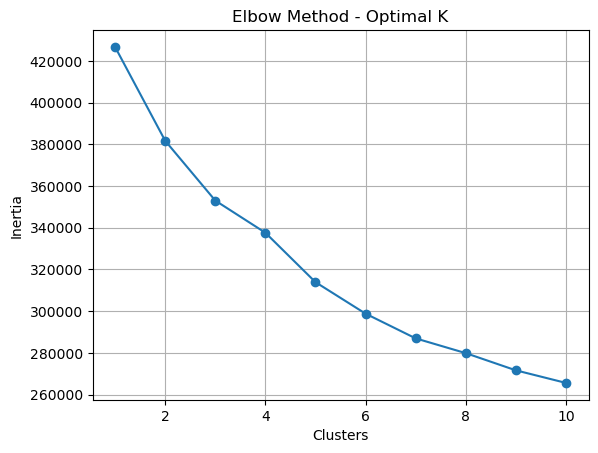

In [27]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [29]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("✅ Clusters Assigned")
print(df[['track_name', 'Cluster']].head())


✅ Clusters Assigned
                                          track_name  Cluster
0  I Don't Care (with Justin Bieber) - Loud Luxur...        2
1                    Memories - Dillon Francis Remix        2
2                    All the Time - Don Diablo Remix        2
3                  Call You Mine - Keanu Silva Remix        0
4            Someone You Loved - Future Humans Remix        2


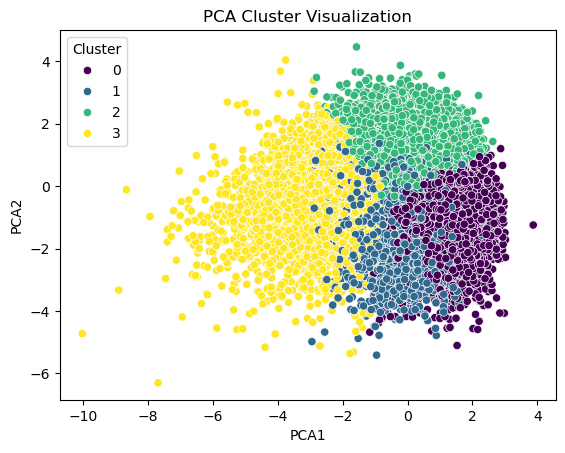

In [31]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("PCA Cluster Visualization")
plt.show()


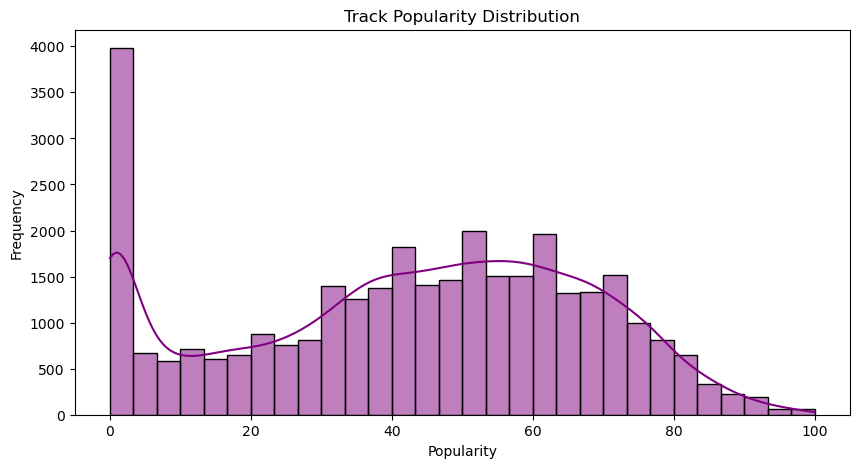

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(df['track_popularity'], kde=True, color='purple', bins=30)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


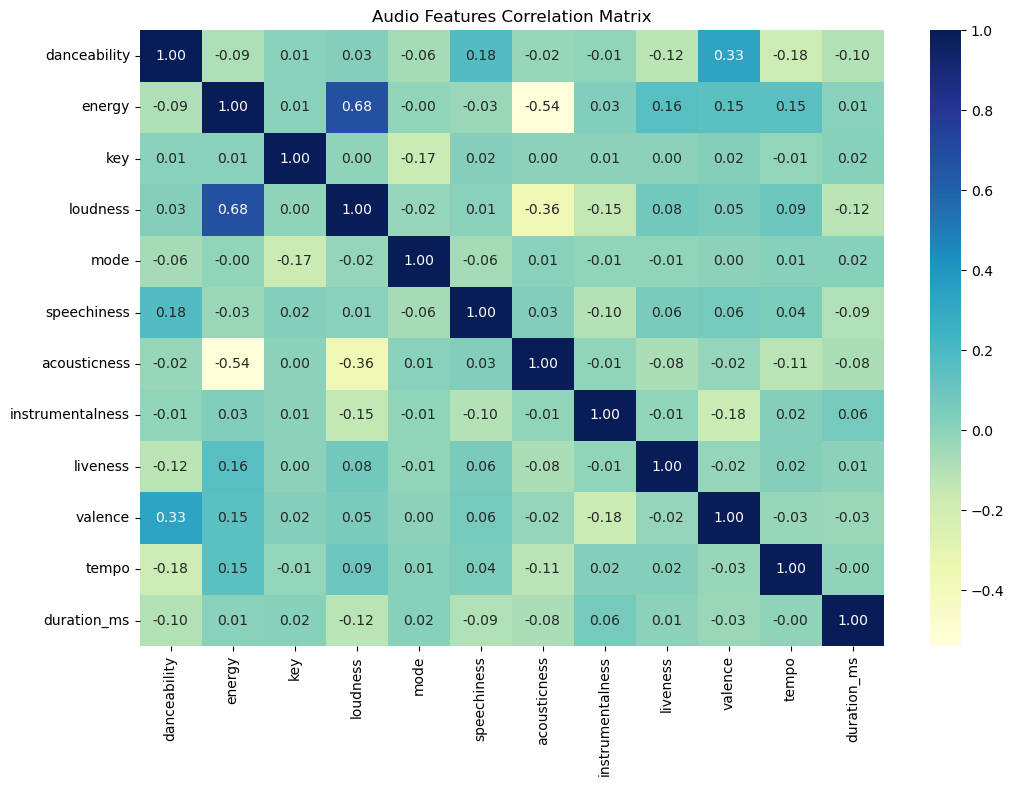

In [54]:
plt.figure(figsize=(12, 8))
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
sns.heatmap(df[audio_features].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Audio Features Correlation Matrix")
plt.show()


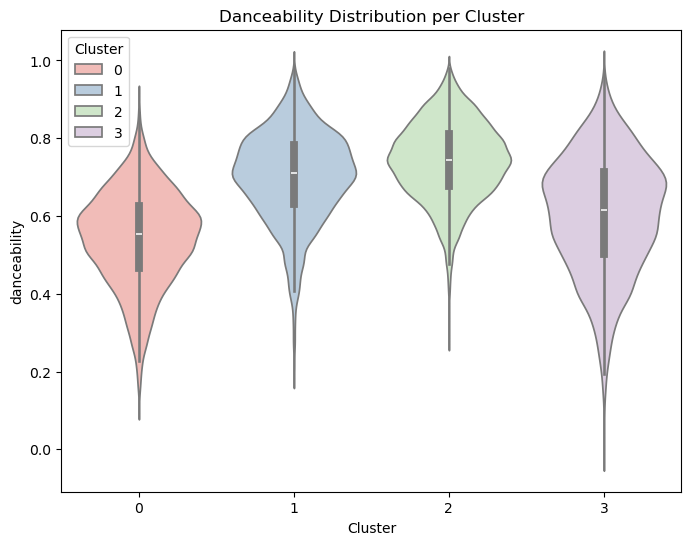

In [50]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cluster', y='danceability', data=df, hue='Cluster', palette='Pastel1')

plt.title("Danceability Distribution per Cluster")
plt.show()


In [47]:

def recommend_song(song_name, df, n=5):
    song = df[df['track_name'].str.lower() == song_name.lower()]
    if song.empty:
        print(f"❌ Song '{song_name}' not found.")
        return None
    cluster = song['Cluster'].values[0]
    similar_songs = df[df['Cluster'] == cluster]
    recommendations = similar_songs[similar_songs['track_name'].str.lower() != song_name.lower()]
    return recommendations[['track_name', 'track_artist']].sample(n)

# Try it:
song = "Shape of You"
print(f"🎵 Recommendations for '{song}':")
print(recommend_song(song, df))


🎵 Recommendations for 'Shape of You':
                      track_name   track_artist
2318             I Kissed A Girl     Katy Perry
25721             YOU'RE THE ONE     KAYTRANADA
18637           Te Quedaste Solo       Fanny Lu
18469  Otra vez (feat. J Balvin)  Zion & Lennox
31663         She Can't Love You        Chemise
